In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_sales.csv")

In [8]:
sales["date"] = pd.to_datetime(sales["date"])

In [9]:
credit = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/Bookstore Credit Balance Dataset.csv")
credit.head()

,date,description,charge,payment,card_id,net_change,rolling_balance
0,2019-01-01,Software subscriptions,768.71,0.0,CC-001,768.71,768.71
1,2019-01-03,E-comm shipping labels,287.53,0.0,CC-001,287.53,1056.24
2,2019-01-07,E-comm shipping labels,188.86,0.0,CC-001,188.86,1245.10
3,2019-01-09,Office & packaging supplies,119.61,0.0,CC-001,119.61,1364.71
4,2019-01-16,Office & packaging supplies,376.30,0.0,CC-001,376.30,1741.01


In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             978 non-null    object 
 1   description      978 non-null    object 
 2   charge           978 non-null    float64
 3   payment          978 non-null    float64
 4   card_id          978 non-null    object 
 5   net_change       978 non-null    float64
 6   rolling_balance  978 non-null    float64
dtypes: float64(4), object(3)
memory usage: 53.6+ KB


In [11]:
credit["date"] = pd.to_datetime(credit["date"])

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             978 non-null    datetime64[ns]
 1   description      978 non-null    object        
 2   charge           978 non-null    float64       
 3   payment          978 non-null    float64       
 4   card_id          978 non-null    object        
 5   net_change       978 non-null    float64       
 6   rolling_balance  978 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 53.6+ KB


In [13]:
credit.describe()

,date,charge,payment,net_change,rolling_balance
count,978,978.000000,978.000000,978.000000,978.000000
mean,2021-12-26 13:38:39.018405120,632.112198,663.645317,-31.533119,-11272.220798
min,2019-01-01 00:00:00,0.000000,0.000000,-11162.470000,-55520.590000
25%,2020-06-03 12:00:00,243.885000,0.000000,243.885000,-25642.132500
50%,2022-01-03 00:00:00,451.605000,0.000000,451.605000,-6081.565000
75%,2023-07-02 12:00:00,675.752500,0.000000,675.752500,2364.362500
max,2024-12-26 00:00:00,3263.420000,11162.470000,3263.420000,21092.960000
std,NaN,656.892138,2088.515265,2373.448681,17973.552047


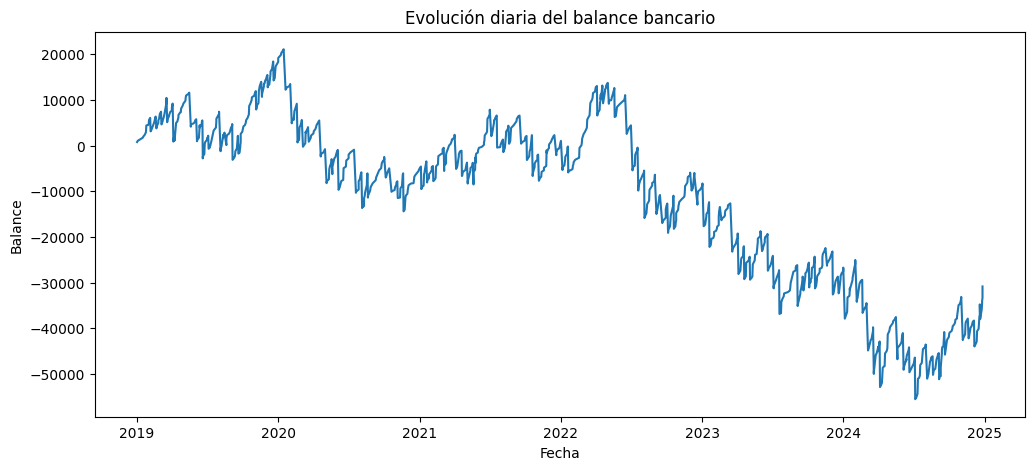

In [14]:
checking_sorted = credit.sort_values("date")

plt.figure(figsize=(12,5))
plt.plot(checking_sorted["date"], checking_sorted["rolling_balance"])
plt.title("Evolución diaria del balance bancario")
plt.xlabel("Fecha")
plt.ylabel("Balance")
plt.show()

In [15]:
credit_monthly = (
    credit
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(
        net_change=("net_change", "sum"),
        balance=("rolling_balance", "last")
    )
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_18096\2002439575.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


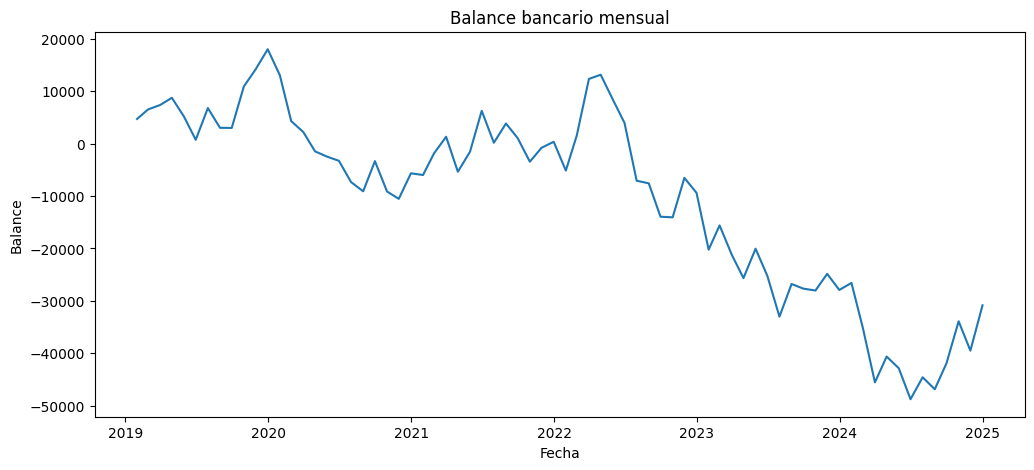

In [16]:
plt.figure(figsize=(12,5))
plt.plot(credit_monthly["date"], credit_monthly["balance"])
plt.title("Balance bancario mensual")
plt.xlabel("Fecha")
plt.ylabel("Balance")
plt.show()

El análisis del balance bancario revela una tendencia negativa sostenida a lo largo de todo el periodo analizado. A pesar del crecimiento progresivo de las ventas observado en años posteriores a la pandemia, el balance de caja continúa deteriorándose, lo que indica un desequilibrio estructural entre ingresos y gastos.

#### NOTA

La cuenta bancaria analizada no refleja directamente los ingresos por ventas, sino que actúa como una cuenta operativa destinada a cubrir los gastos diarios del negocio. Por este motivo, su evolución no sigue el patrón de las ventas y muestra una tendencia descendente asociada al consumo de liquidez.

In [17]:
# sales mensual (si no lo tienes ya)
sales_monthly = (
    sales
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(net_revenue=("net_revenue", "sum"))
    .reset_index()
)

# merge
financial = pd.merge(
    sales_monthly,
    credit_monthly,
    on="date",
    how="inner"
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_18096\3578459492.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


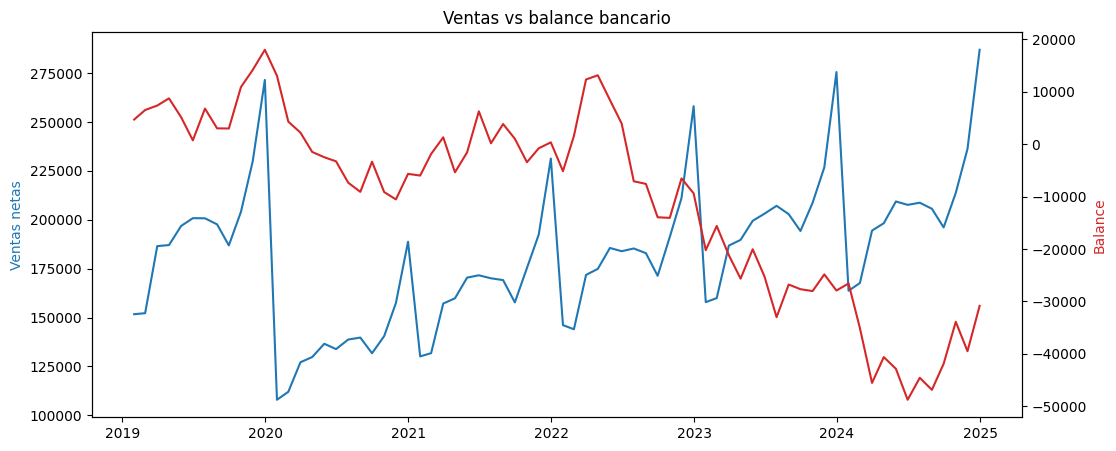

In [18]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(financial["date"], financial["net_revenue"], color="tab:blue")
ax1.set_ylabel("Ventas netas", color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(financial["date"], financial["balance"], color="tab:red")
ax2.set_ylabel("Balance", color="tab:red")

plt.title("Ventas vs balance bancario")
plt.show()